# About this file
This dataset contains about 10 years of daily weather observations from numerous Australian weather stations.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No?
This column is Yes if the rain for that day was 1mm or more.




 RISK_MM is the amount of rainfall in millimeters for the next day.
It includes all forms of precipitation that reach the ground, such as rain, drizzle, hail and snow. And it was the column that was used to actually determine whether or not it rained to create the binary target. For example, if RISK_MM was greater than 1mm, then the RainTomorrow target variable is equal to Yes.

Since it contains information about the future, and since it contains information directly about the target variable, including it would leak the future information to your model. Using it as a predictor to build a model and then testing on this dataset would give the false appearance of a high accuracy.

It is included in the dataset so that if you wanted to create your own binary target and decide that a really small amount of rain like 0.1 mm shouldn't be counted as a rainstorm, you could try predicting only more significant amounts of rain.

It's also included in the dataset so that, if you wanted to, you could use the dataset to build a regression machine learning model -- instead of classification. In other words, you can use RISK_MM as your target and drop RainTomorrow if you want to treat this as a regression problem instead of a classification problem.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency

In [2]:
df=pd.read_csv('weatherAUS.csv')

In [3]:
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.shape

(145460, 23)

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [7]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [8]:
for i in df.columns:
    if df[i].isnull().sum()>55887:
        df.drop(i,inplace=True,axis=1)

In [9]:
df.shape

(145460, 19)

In [10]:
#filling missing values
for col in df.columns:
    if df[col].dtype !='O':
        df[col]=df[col].fillna(df[col].median())


In [11]:
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

# RainTomorrow

In [12]:
import statistics 

In [13]:
df.RainTomorrow.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [14]:
g=statistics.mode(df.RainTomorrow)

In [15]:
df.RainTomorrow.fillna(g,inplace=True)

In [16]:
df.RainTomorrow.isnull().sum()

0

In [17]:
df.RainTomorrow.value_counts()

No     113583
Yes     31877
Name: RainTomorrow, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

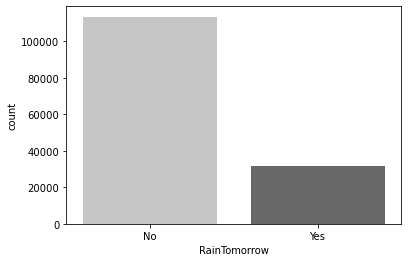

In [18]:
sns.countplot(df.RainTomorrow,palette='Greys')

# Date

In [19]:
df.Date.value_counts()

2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: Date, Length: 3436, dtype: int64

In [20]:
df.Date=pd.to_datetime(df.Date)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   WindGustDir    135134 non-null  object        
 6   WindGustSpeed  145460 non-null  float64       
 7   WindDir9am     134894 non-null  object        
 8   WindDir3pm     141232 non-null  object        
 9   WindSpeed9am   145460 non-null  float64       
 10  WindSpeed3pm   145460 non-null  float64       
 11  Humidity9am    145460 non-null  float64       
 12  Humidity3pm    145460 non-null  float64       
 13  Pressure9am    145460 non-null  float64       
 14  Pressure3pm    145460 non-null  float64       
 15  

In [22]:
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day

In [23]:
df.drop('Date',inplace=True,axis=1)

In [24]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,22.0,1007.7,1007.1,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,...,25.0,1010.6,1007.8,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,...,30.0,1007.6,1008.7,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,...,16.0,1017.6,1012.8,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,33.0,1010.8,1006.0,17.8,29.7,No,No,2008,12,5


In [25]:
df.Location.replace({'':0},inplace=True)

# Location

In [26]:
df.Location.value_counts()

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown         3009


C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Location', ylabel='count'>

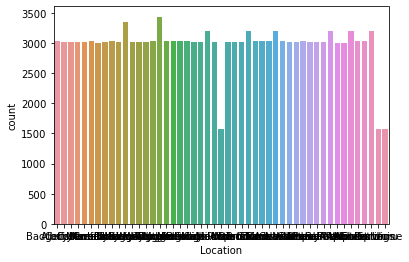

In [27]:
sns.countplot(df.Location)

In [28]:
chi2_contingency(pd.crosstab(df.RainTomorrow,df.Location))[1]

0.0

# MinTemp

In [29]:
df.MinTemp.value_counts()

 12.0    2351
 11.0     899
 10.2     898
 9.6      896
 10.5     884
         ... 
 30.5       1
-7.3        1
-7.8        1
-7.2        1
 30.2       1
Name: MinTemp, Length: 389, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MinTemp', ylabel='Density'>

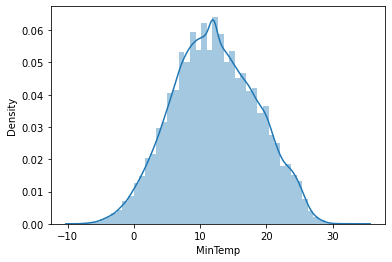

In [30]:
sns.distplot(df.MinTemp)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MinTemp'>

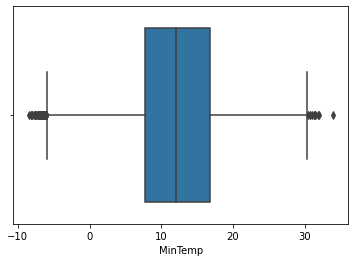

In [31]:
sns.boxplot(df.MinTemp)

In [32]:
q3=df.MinTemp.quantile(0.75)
q1=df.MinTemp.quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)
df.MinTemp=np.where(df.MinTemp>upper,upper,df.MinTemp)
df.MinTemp=np.where(df.MinTemp<lower,lower,df.MinTemp)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MinTemp'>

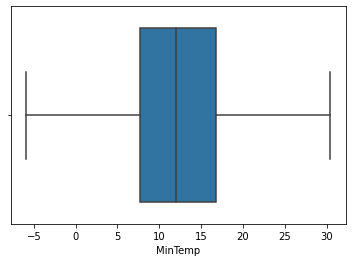

In [33]:
sns.boxplot(df.MinTemp)

In [34]:
model=ols('MinTemp~RainTomorrow',data=df).fit()
anova=sm.stats.anova_lm(model,type=2)
print(anova)

                    df        sum_sq       mean_sq           F         PR(>F)
RainTomorrow       1.0  3.986565e+04  39865.649456  990.868093  9.337704e-217
Residual      145458.0  5.852220e+06     40.233054         NaN            NaN


# MaxTemp

In [35]:
df.MaxTemp.value_counts()

 22.6    1998
 20.0     885
 19.0     843
 19.8     840
 20.4     834
         ... 
 46.5       1
 46.9       1
 47.0       1
 46.6       1
-2.4        1
Name: MaxTemp, Length: 505, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

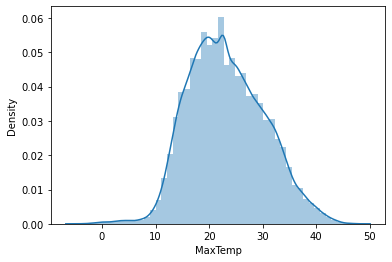

In [36]:
sns.distplot(df.MaxTemp)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MaxTemp'>

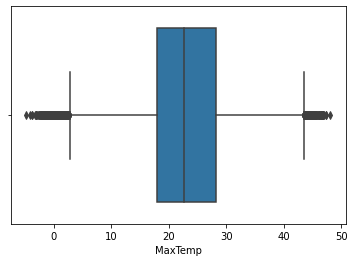

In [37]:
sns.boxplot(df.MaxTemp)

In [38]:
q3=df.MaxTemp.quantile(0.75)
q1=df.MaxTemp.quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)
df.MaxTemp=np.where(df.MaxTemp>upper,upper,df.MaxTemp)
df.MaxTemp=np.where(df.MaxTemp<lower,lower,df.MaxTemp)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MaxTemp'>

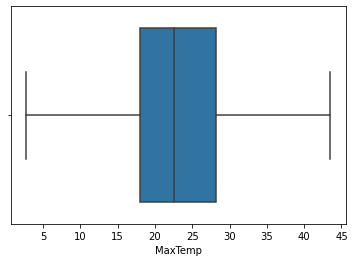

In [39]:
sns.boxplot(df.MaxTemp)

# Rainfall

In [40]:
df.Rainfall.value_counts()

0.0      94341
0.2       8761
0.4       3782
0.6       2592
0.8       2056
         ...  
134.8        1
84.4         1
157.6        1
166.8        1
69.0         1
Name: Rainfall, Length: 681, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

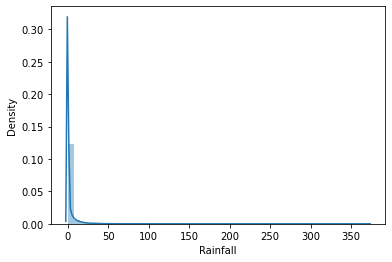

In [41]:
sns.distplot(df.Rainfall)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rainfall'>

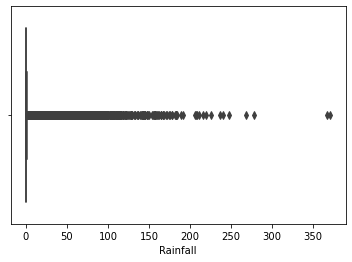

In [42]:
sns.boxplot(df.Rainfall)

In [43]:
q3=df.Rainfall.quantile(0.75)
q1=df.Rainfall.quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)
df.drop(df[df.Rainfall>175].index,inplace=True)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rainfall'>

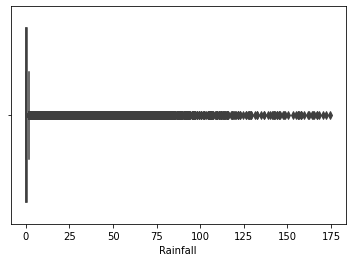

In [44]:
sns.boxplot(df.Rainfall)

In [45]:
df.Rainfall=np.where(df.Rainfall>upper,upper,df.Rainfall)
df.Rainfall=np.where(df.Rainfall<lower,lower,df.Rainfall)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rainfall'>

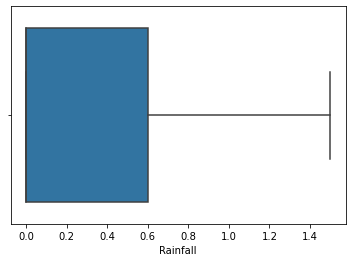

In [46]:
sns.boxplot(df.Rainfall)

# WindGustDir

In [47]:
df.WindGustDir.value_counts()

W      9915
SE     9416
N      9313
SSE    9216
E      9179
S      9165
WSW    9066
SW     8967
SSW    8735
WNW    8250
NW     8120
ENE    8102
ESE    7370
NE     7132
NNW    6620
NNE    6547
Name: WindGustDir, dtype: int64

In [48]:
df.WindGustDir.isnull().sum()

10323

In [49]:
df.WindGustDir.mode()    

0    W
Name: WindGustDir, dtype: object

In [50]:
df.WindGustDir.fillna('W',inplace=True)

In [51]:
df.WindGustDir.isnull().sum()

0

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WindGustDir', ylabel='count'>

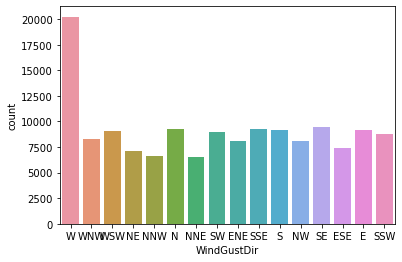

In [52]:
sns.countplot(df.WindGustDir)

In [53]:
chi2_contingency(pd.crosstab(df.RainTomorrow,df.WindGustDir))[1]

3.387658851153132e-308

# WindGustSpeed

In [54]:
df.WindGustSpeed.value_counts()

39.0     19054
35.0      9215
31.0      8428
37.0      8046
33.0      7932
         ...  
122.0        3
126.0        2
124.0        2
130.0        1
6.0          1
Name: WindGustSpeed, Length: 67, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='WindGustSpeed', ylabel='Density'>

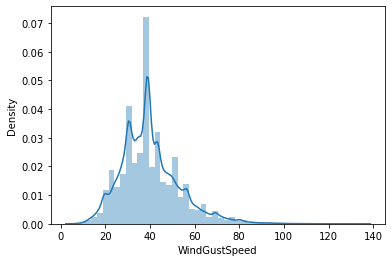

In [55]:
sns.distplot(df.WindGustSpeed)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WindGustSpeed'>

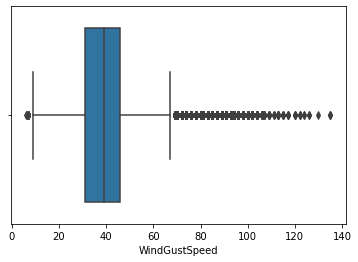

In [56]:
sns.boxplot(df.WindGustSpeed)

In [57]:
q3=df.WindGustSpeed.quantile(0.75)
q1=df.WindGustSpeed.quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)
df.drop(df[df.WindGustSpeed>120].index,inplace=True)

In [58]:
df.WindGustSpeed=np.where(df.WindGustSpeed>upper,upper,df.WindGustSpeed)
df.WindGustSpeed=np.where(df.WindGustSpeed<lower,lower,df.WindGustSpeed)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WindGustSpeed'>

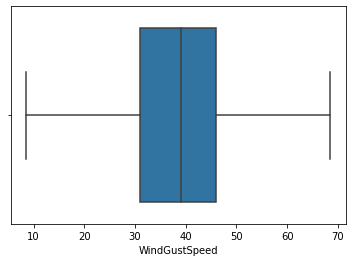

In [59]:
sns.boxplot(df.WindGustSpeed)

# WindDir9am

In [60]:
df.WindDir9am.value_counts()

N      11754
SE      9286
E       9175
SSE     9108
NW      8747
S       8656
W       8459
SW      8419
NNE     8128
NNW     7979
ENE     7834
NE      7669
ESE     7628
SSW     7586
WNW     7408
WSW     7023
Name: WindDir9am, dtype: int64

In [61]:
n=statistics.mode(df.WindDir9am)

In [62]:
df.WindDir9am.fillna(n,inplace=True)

In [63]:
df.WindDir9am.isnull().sum()

0

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WindDir9am', ylabel='count'>

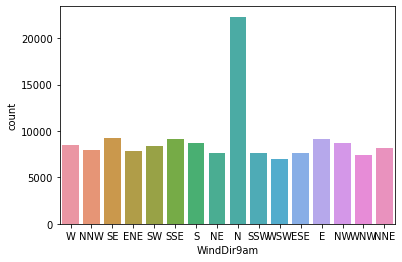

In [64]:
sns.countplot(df.WindDir9am)

In [65]:
chi2_contingency(pd.crosstab(df.RainTomorrow,df.WindDir9am))[1]

0.0

# WindDir3pm

In [66]:
df.WindDir3pm.value_counts()

SE     10835
W      10108
S       9922
WSW     9514
SSE     9399
SW      9353
N       8889
WNW     8870
NW      8608
ESE     8503
E       8472
NE      8263
SSW     8155
NNW     7868
ENE     7855
NNE     6586
Name: WindDir3pm, dtype: int64

In [67]:
s=statistics.mode(df.WindDir3pm)

In [68]:
df.WindDir3pm.fillna(s,inplace=True)

In [69]:
df.WindDir3pm.isnull().sum()

0

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WindDir3pm', ylabel='count'>

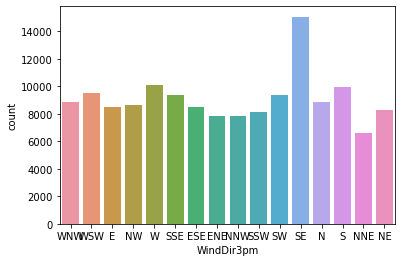

In [70]:
sns.countplot(df.WindDir3pm)

In [71]:
chi2_contingency(pd.crosstab(df.RainTomorrow,df.WindDir3pm))[1]

9.396310551793893e-248

# WindSpeed9am

In [72]:
df.WindSpeed9am.value_counts()

13.0     14898
9.0      13647
11.0     11727
17.0     10785
7.0      10783
15.0     10623
6.0       9117
19.0      8762
0.0       8745
20.0      8062
4.0       6358
22.0      5669
24.0      5450
2.0       4609
26.0      3764
28.0      3568
30.0      2336
31.0      2020
33.0      1130
35.0       976
37.0       587
39.0       454
41.0       324
43.0       272
44.0       197
46.0       174
50.0        88
48.0        87
52.0        65
56.0        44
54.0        38
57.0        22
61.0        11
63.0         8
65.0         7
59.0         5
74.0         4
67.0         4
69.0         2
83.0         1
130.0        1
72.0         1
Name: WindSpeed9am, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WindSpeed9am', ylabel='count'>

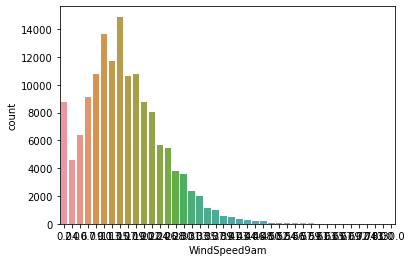

In [73]:
sns.countplot(df.WindSpeed9am)

In [74]:
chi2_contingency(pd.crosstab(df.RainTomorrow,df.WindSpeed9am))[1]

2.1073250718076727e-233

# WindSpeed3pm

In [75]:
df.WindSpeed3pm.value_counts()

19.0    14320
13.0    12578
17.0    12539
20.0    11710
15.0    11483
11.0    10012
9.0      9753
24.0     9051
22.0     8598
28.0     6552
26.0     6508
7.0      5902
30.0     4585
31.0     3983
6.0      3805
33.0     2509
4.0      2249
35.0     2151
37.0     1369
0.0      1111
39.0     1105
2.0      1034
41.0      655
43.0      558
44.0      351
46.0      286
50.0      181
48.0      181
52.0       85
54.0       58
56.0       55
57.0       27
59.0       20
61.0       18
65.0       18
63.0       13
69.0        3
83.0        2
72.0        2
76.0        2
87.0        1
78.0        1
67.0        1
Name: WindSpeed3pm, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WindSpeed3pm', ylabel='count'>

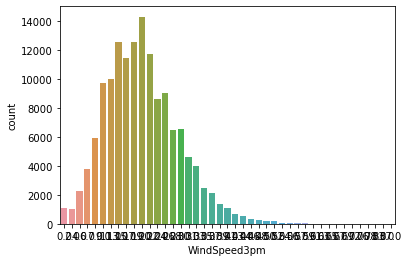

In [76]:
sns.countplot(df.WindSpeed3pm)

In [77]:
chi2_contingency(pd.crosstab(df.RainTomorrow,df.WindSpeed3pm))[1]

0.0

# Humidity9am

In [78]:
df.Humidity9am.value_counts()

70.0    5679
99.0    3391
69.0    3023
65.0    3014
68.0    3010
        ... 
4.0       20
3.0       10
2.0        8
1.0        5
0.0        1
Name: Humidity9am, Length: 101, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Humidity9am', ylabel='Density'>

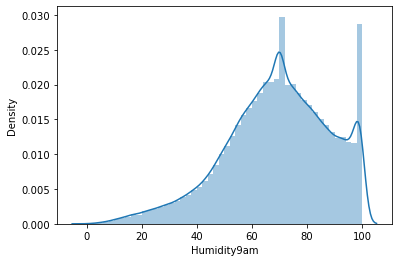

In [79]:
sns.distplot(df.Humidity9am)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Humidity9am'>

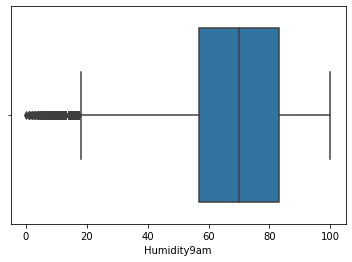

In [80]:
sns.boxplot(df.Humidity9am)

In [81]:
q3=df.Humidity9am.quantile(0.75)
q1=df.Humidity9am.quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)
df.Humidity9am=np.where(df.Humidity9am<lower,lower,df.Humidity9am)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Humidity9am'>

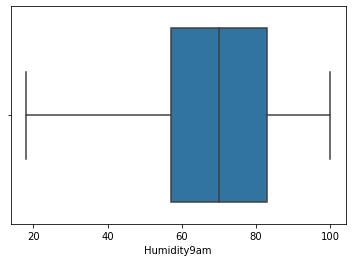

In [82]:
sns.boxplot(df.Humidity9am)

# Humidity3pm

In [83]:
df.Humidity3pm.value_counts()

52.0    7255
55.0    2738
57.0    2728
53.0    2697
59.0    2690
        ... 
4.0      113
3.0       63
2.0       35
1.0       26
0.0        4
Name: Humidity3pm, Length: 101, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Humidity3pm', ylabel='Density'>

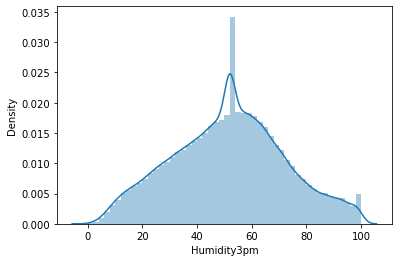

In [84]:
sns.distplot(df.Humidity3pm)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Humidity3pm'>

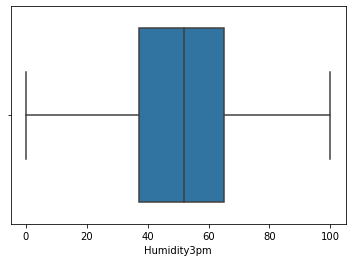

In [85]:
sns.boxplot(df.Humidity3pm)

In [86]:
q3=df.MinTemp.quantile(0.75)
q1=df.MinTemp.quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)
df.MinTemp=np.where(df.MinTemp>upper,upper,df.MinTemp)
df.MinTemp=np.where(df.MinTemp<lower,lower,df.MinTemp)

# Pressure9am

In [87]:
df.Pressure9am.value_counts()

1017.6    15815
1016.4      816
1017.9      789
1016.3      775
1018.7      775
          ...  
986.3         1
988.0         1
987.0         1
1040.0        1
990.6         1
Name: Pressure9am, Length: 546, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pressure9am', ylabel='Density'>

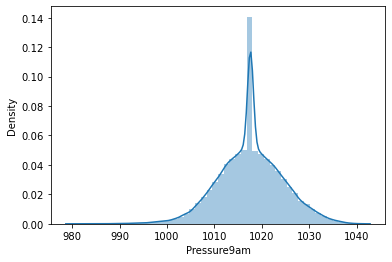

In [88]:
sns.distplot(df.Pressure9am)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pressure9am'>

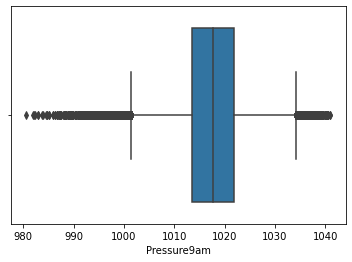

In [89]:
sns.boxplot(df.Pressure9am)

In [90]:
q3=df.Pressure9am.quantile(0.75)
q1=df.Pressure9am.quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)
df.Pressure9am=np.where(df.Pressure9am>upper,upper,df.Pressure9am)
df.Pressure9am=np.where(df.Pressure9am<lower,lower,df.Pressure9am)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pressure9am'>

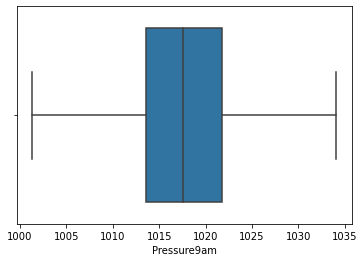

In [91]:
sns.boxplot(df.Pressure9am)

# Pressure3pm

In [92]:
df.Pressure3pm.value_counts()

1015.2    15767
1015.3      786
1015.5      783
1015.6      776
1015.7      773
          ...  
988.4         1
1037.2        1
1037.6        1
987.6         1
989.5         1
Name: Pressure3pm, Length: 548, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pressure3pm', ylabel='Density'>

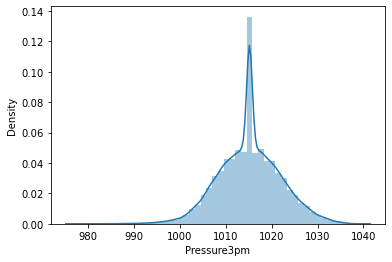

In [93]:
sns.distplot(df.Pressure3pm)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pressure3pm'>

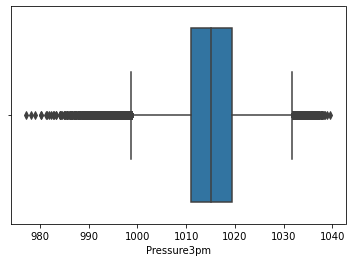

In [94]:
sns.boxplot(df.Pressure3pm)

In [95]:
q3=df.Pressure3pm.quantile(0.75)
q1=df.Pressure3pm.quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)
df.Pressure3pm=np.where(df.Pressure3pm>upper,upper,df.Pressure3pm)
df.Pressure3pm=np.where(df.Pressure3pm<lower,lower,df.Pressure3pm)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pressure3pm'>

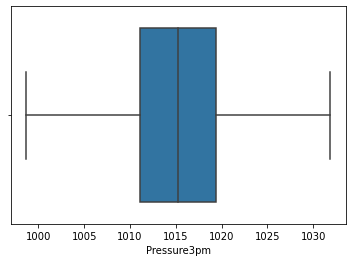

In [96]:
sns.boxplot(df.Pressure3pm)

# Temp9am

In [97]:
df.Temp9am.value_counts()

 16.7    2574
 17.0     912
 13.8     900
 14.8     894
 16.0     882
         ... 
-7.2        1
-7.0        1
-3.5        1
-6.2        1
 38.0       1
Name: Temp9am, Length: 441, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temp9am', ylabel='Density'>

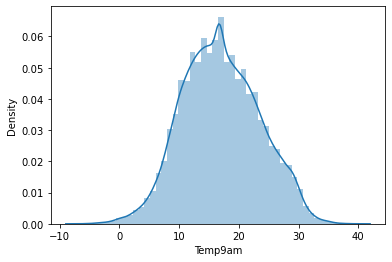

In [98]:
sns.distplot(df.Temp9am)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temp9am'>

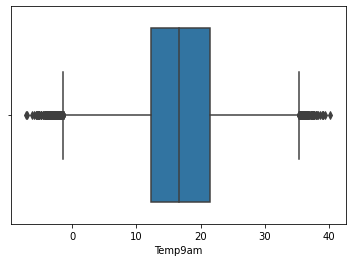

In [99]:
sns.boxplot(df.Temp9am)

In [100]:
q3=df.Temp9am.quantile(0.75)
q1=df.Temp9am.quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)
df.Temp9am=np.where(df.Temp9am>upper,upper,df.Temp9am)
df.Temp9am=np.where(df.Temp9am<lower,lower,df.Temp9am)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temp9am'>

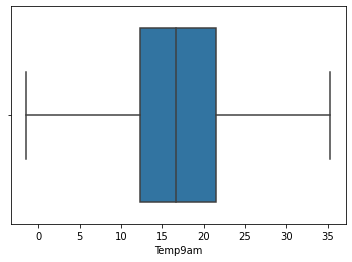

In [101]:
sns.boxplot(df.Temp9am)

# RainToday

In [102]:
df.RainToday.value_counts()

No     110314
Yes     31852
Name: RainToday, dtype: int64

In [103]:
n=statistics.mode(df.RainToday)

In [104]:
df.RainToday.fillna(n,inplace=True)

In [105]:
df.RainToday.isnull().sum()

0

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RainToday', ylabel='count'>

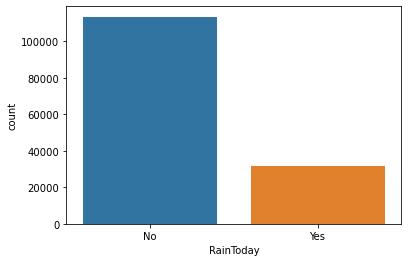

In [106]:
sns.countplot(df.RainToday)

In [107]:
chi2_contingency(pd.crosstab(df.RainTomorrow,df.RainToday))[1]

0.0

<AxesSubplot:>

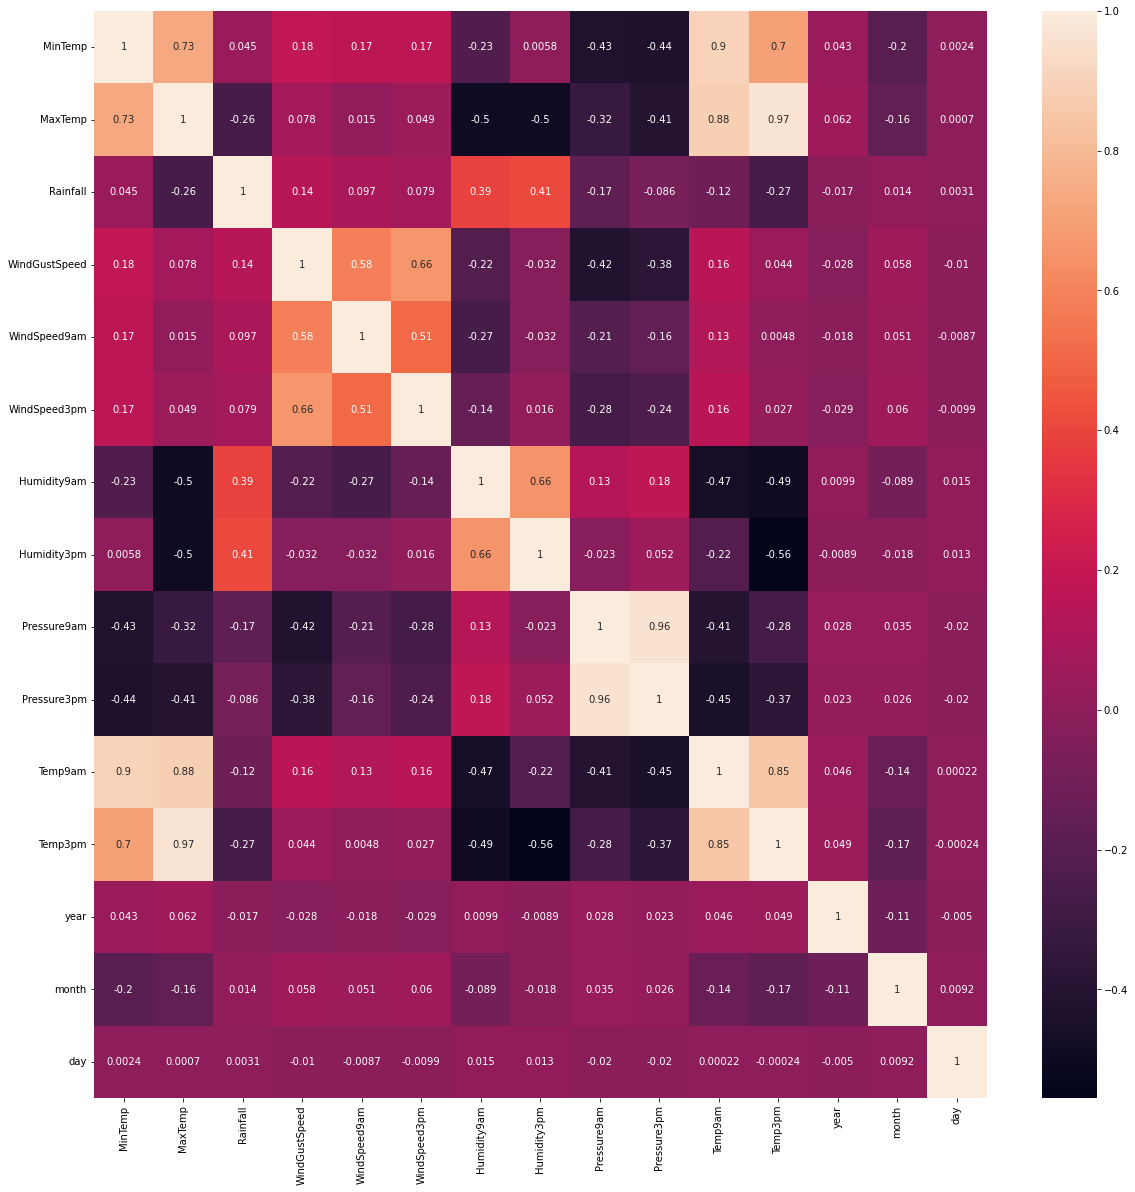

In [108]:

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [109]:
df.drop(['MinTemp','Pressure9am','Temp9am'],axis=1,inplace=True)

<AxesSubplot:>

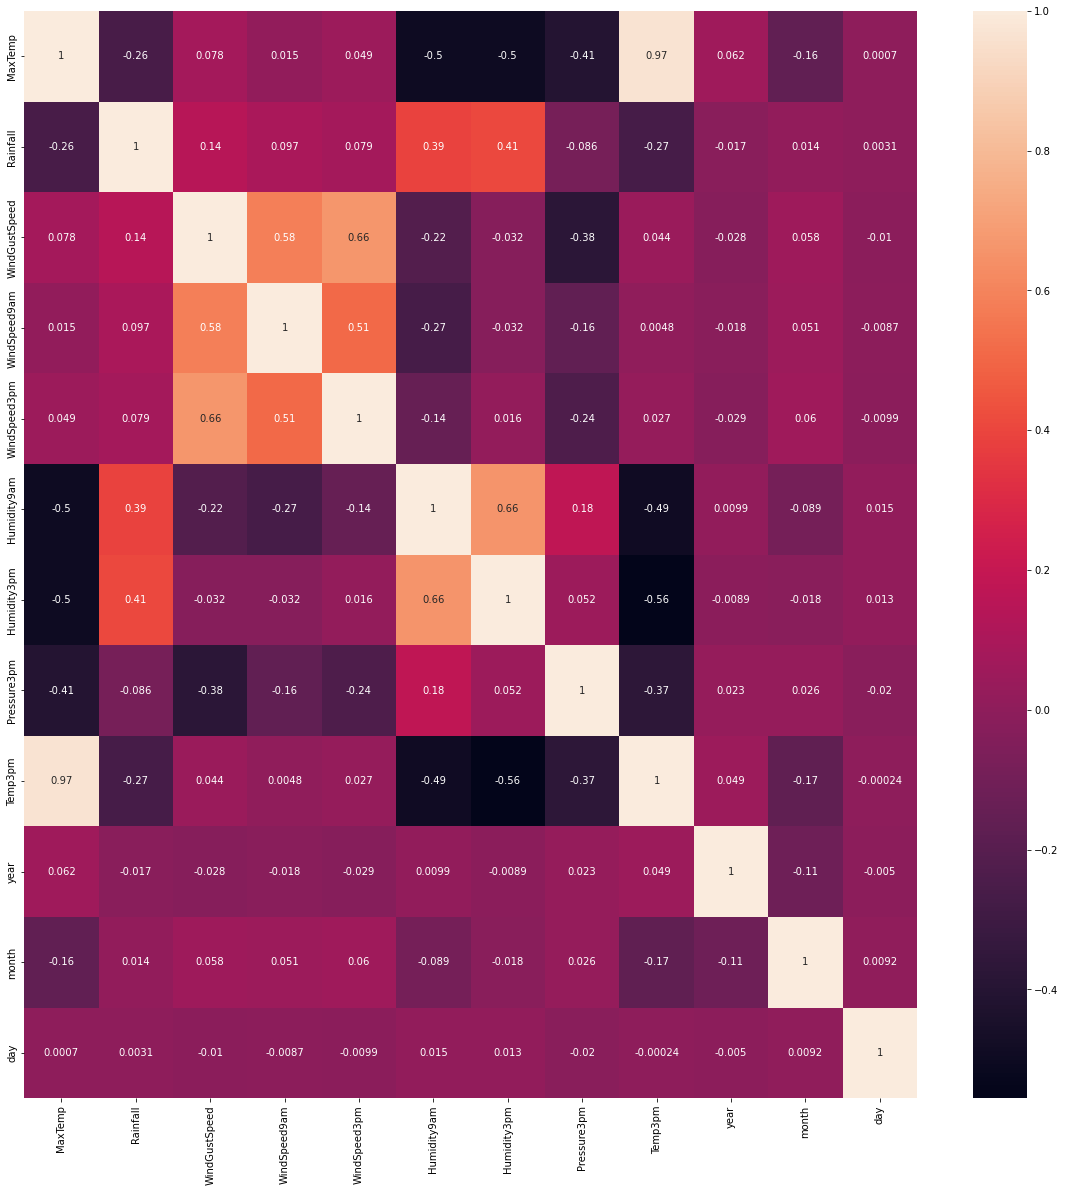

In [110]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [111]:
X=df.select_dtypes('number')
X.columns

Index(['MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Temp3pm', 'year', 'month',
       'day'],
      dtype='object')

In [112]:
v=['MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Temp3pm']

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [114]:
vif=df[v]

In [115]:
vif_da = df[v]
vif_data = pd.DataFrame()
vif_data["feature"] = vif_da.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(vif_da.values,i) for i in range(len(vif_da.columns))]
  
print(vif_data)


         feature         VIF
0        MaxTemp  214.353521
1       Rainfall    1.851192
2  WindGustSpeed   24.978177
3   WindSpeed9am    5.998845
4   WindSpeed3pm   10.470938
5    Humidity9am   34.156577
6    Humidity3pm   17.230344
7    Pressure3pm   73.595228
8        Temp3pm  210.167531


In [116]:
df.drop(['MaxTemp','Temp3pm'],axis=1,inplace=True)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145425 entries, 0 to 145459
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145425 non-null  object 
 1   Rainfall       145425 non-null  float64
 2   WindGustDir    145425 non-null  object 
 3   WindGustSpeed  145425 non-null  float64
 4   WindDir9am     145425 non-null  object 
 5   WindDir3pm     145425 non-null  object 
 6   WindSpeed9am   145425 non-null  float64
 7   WindSpeed3pm   145425 non-null  float64
 8   Humidity9am    145425 non-null  float64
 9   Humidity3pm    145425 non-null  float64
 10  Pressure3pm    145425 non-null  float64
 11  RainToday      145425 non-null  object 
 12  RainTomorrow   145425 non-null  object 
 13  year           145425 non-null  int64  
 14  month          145425 non-null  int64  
 15  day            145425 non-null  int64  
dtypes: float64(7), int64(3), object(6)
memory usage: 18.9+ MB


In [118]:
df.head()

,Location,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,RainToday,RainTomorrow,year,month,day
0,Albury,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.1,No,No,2008,12,1
1,Albury,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1007.8,No,No,2008,12,2
2,Albury,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1008.7,No,No,2008,12,3
3,Albury,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1012.8,No,No,2008,12,4
4,Albury,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1006.0,No,No,2008,12,5


In [119]:
from sklearn.preprocessing import LabelEncoder

In [120]:
c=df.select_dtypes('object')

In [121]:
c.drop(['Location','WindGustDir','WindDir9am','WindDir3pm'],axis=1,inplace=True)

In [122]:
c

,RainToday,RainTomorrow
0,No,No
1,No,No
2,No,No
3,No,No
4,No,No
...,...,...
145455,No,No
145456,No,No
145457,No,No
145458,No,No


In [123]:
le=LabelEncoder()


In [124]:
for i in c.columns:
    df[i]=le.fit_transform(df[i])

In [125]:
df.head()

,Location,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,RainToday,RainTomorrow,year,month,day
0,Albury,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.1,0,0,2008,12,1
1,Albury,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1007.8,0,0,2008,12,2
2,Albury,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1008.7,0,0,2008,12,3
3,Albury,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1012.8,0,0,2008,12,4
4,Albury,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1006.0,0,0,2008,12,5


In [126]:
xdum=pd.get_dummies(df.Location,drop_first=True)
q=pd.get_dummies(df.WindGustDir,drop_first=True)
w=pd.get_dummies(df.WindDir9am,drop_first=True)
e=pd.get_dummies(df.WindDir3pm,drop_first=True)

In [127]:
df=pd.concat([df,xdum,q,w,e],axis=1)

In [128]:
df.drop(['Location','WindGustDir','WindDir9am','WindDir3pm'],axis=1,inplace=True)

In [129]:
df.head()

,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,RainToday,RainTomorrow,year,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0.6,44.0,20.0,24.0,71.0,22.0,1007.1,0,0,2008,...,0,0,0,0,0,0,0,0,1,0
1,0.0,44.0,4.0,22.0,44.0,25.0,1007.8,0,0,2008,...,0,0,0,0,0,0,0,0,0,1
2,0.0,46.0,19.0,26.0,38.0,30.0,1008.7,0,0,2008,...,0,0,0,0,0,0,0,0,0,1
3,0.0,24.0,11.0,9.0,45.0,16.0,1012.8,0,0,2008,...,0,0,0,0,0,0,0,0,0,0
4,1.0,41.0,7.0,20.0,82.0,33.0,1006.0,0,0,2008,...,0,1,0,0,0,0,0,0,0,0


In [130]:
df.RainTomorrow.value_counts()

0    113575
1     31850
Name: RainTomorrow, dtype: int64

In [131]:
from sklearn.utils import resample

In [132]:
zero=df[df.RainTomorrow==0]
one=df[df.RainTomorrow==1]

In [133]:
over=resample(one,replace=True,n_samples=len(zero),random_state=27)

In [134]:
df=pd.concat([zero,over])

In [135]:
df.RainTomorrow.value_counts()

0    113575
1    113575
Name: RainTomorrow, dtype: int64

In [136]:
x=df.drop('RainTomorrow',axis=1)

In [137]:
y=df['RainTomorrow']

In [138]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)


In [139]:
from sklearn.tree import DecisionTreeClassifier

In [140]:
from sklearn.metrics import accuracy_score,roc_auc_score,auc,roc_curve,classification_report,confusion_matrix

In [155]:
dt=DecisionTreeClassifier(max_depth=4)
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=4)

In [156]:
y_pred=dt.predict(xtest)

In [157]:
accuracy_score(ytest,y_pred)

0.7448382126348227

In [158]:
confusion_matrix(ytest,y_pred)

array([[23808, 10207],
       [ 7181, 26949]], dtype=int64)

In [159]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73     34015
           1       0.73      0.79      0.76     34130

    accuracy                           0.74     68145
   macro avg       0.75      0.74      0.74     68145
weighted avg       0.75      0.74      0.74     68145



In [160]:
#ROC
y_pred_prob=dt.predict_proba(xtest)
fpr,tpr,th=roc_curve(ytest,y_pred_prob[:,1])
roc_auc=auc(fpr,tpr)
print(roc_auc)

0.8193909699013797


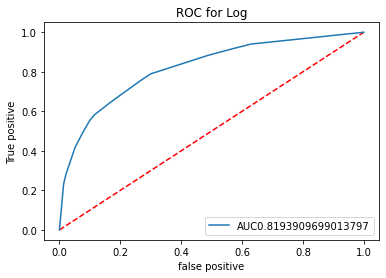

In [161]:
plt.title('ROC for Log')
plt.xlabel('false positive')
plt.ylabel('True positive')
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr,label='AUC'+str(roc_auc))
plt.legend(loc=4)

plt.show()